<a href="https://colab.research.google.com/github/amritanshkm/CITS4403-Project/blob/main/notebooks/01_Insolvency_and_Wealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AFSA Insolvency and Wealth Data

Using the AFSA data, we will analyse the relationship the relationship between insolvency/bankruptcy and wealth distribution. This process includes:

1. Data Preparation
2. Exploratory Data Analysis
3. Generating visualisations, outputs, and observations


#Data Preparation

This phase involves cleaning the data so it can be used to conduct EDA and modelling. Tasks such as resolving NAs, data type problems, and managing aggregate records are included.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#personal insolvency
#regional insolvency

pinsol = '/content/drive/MyDrive/CITS4403/quarterly_personal_insolvencies.csv'
rinsol = '/content/drive/MyDrive/CITS4403/regional_quarterly_time_series.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pinsolpd = pd.read_csv(pinsol, usecols=range(5))
rinsolpd = pd.read_csv(rinsol)

In [6]:
pinsolpd

,Quarter,Type of personal insolvency administration,State,In a business or company,Number of people entering a new personal insolvency
0,Sep-07,Debtor's petition,New South Wales,Yes,641
1,Sep-07,Debtor's petition,Victoria,Yes,377
2,Sep-07,Debtor's petition,Queensland,Yes,367
3,Sep-07,Debtor's petition,South Australia,Yes,96
4,Sep-07,Debtor's petition,Western Australia,Yes,81
...,...,...,...,...,...
15115,Jun-25,Total personal insolvencies,Northern Territory,Total,11
15116,Jun-25,Total personal insolvencies,Western Australia,Total,236
15117,Jun-25,Total personal insolvencies,Tasmania,Total,79
15118,Jun-25,Total personal insolvencies,Other,Total,229


In [7]:
rinsolpd

,Quarter,State,ASGS Code,ASGS Name,In a business or company,Number of people entering a new personal insolvency
0,Sep-07,New South Wales,10102,Queanbeyan,Yes,4
1,Sep-07,New South Wales,10102,Queanbeyan,No,14
2,Sep-07,New South Wales,10102,Queanbeyan,Total,18
3,Sep-07,New South Wales,10103,Snowy Mountains,Yes,Data not available
4,Sep-07,New South Wales,10103,Snowy Mountains,No,Data not available
...,...,...,...,...,...,...
78619,Jun-25,Other Territories,90104,Norfolk Island,No,Data not available
78620,Jun-25,Other Territories,90104,Norfolk Island,Total,Data not available
78621,Jun-25,Other Territories,9OTER,Other Territories,Yes,0
78622,Jun-25,Other Territories,9OTER,Other Territories,No,0


In [8]:
#checking NA values

pinsolpd.info()

rinsolpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Quarter                                              15120 non-null  object
 1   Type of personal insolvency administration           15120 non-null  object
 2   State                                                15120 non-null  object
 3   In a business or company                             15120 non-null  object
 4   Number of people entering a new personal insolvency  15120 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 590.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78624 entries, 0 to 78623
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0 

Pinsol has two empty columns which were removed with the function usecols.

There are otherwise no NA values, but many columns are incorrect data types.

The data frame has many aggregation rows, which might obfuscate any EDA performed on them. Thus, it is necessary to remove them. The algorithm is as follows:

1. If state = total, drop row
2. If type = total, add that row to a new data frame. else, Add it to a "remaining" data frame.
3. From the "remaining" data frame, if the entity is a business, add it b_pinsol.
If not a business, add it to i_pinsol.



In [9]:
pinsolpd['Quarter'] = pd.to_datetime(pinsolpd['Quarter'], format='%b-%y').dt.to_period('Q')
rinsolpd['Quarter'] = pd.to_datetime(rinsolpd['Quarter'], format='%b-%y').dt.to_period('Q')

print(pinsolpd.head())
print(rinsolpd.head())

  Quarter Type of personal insolvency administration              State  \
0  2007Q3                          Debtor's petition    New South Wales   
1  2007Q3                          Debtor's petition           Victoria   
2  2007Q3                          Debtor's petition         Queensland   
3  2007Q3                          Debtor's petition    South Australia   
4  2007Q3                          Debtor's petition  Western Australia   

  In a business or company  \
0                      Yes   
1                      Yes   
2                      Yes   
3                      Yes   
4                      Yes   

   Number of people entering a new personal insolvency  
0                                                641    
1                                                377    
2                                                367    
3                                                 96    
4                                                 81    
  Quarter            State

In [10]:
staterem = pinsolpd[pinsolpd['State'].str.lower() != 'total'].copy()

total_pinsol = staterem[staterem['Type of personal insolvency administration'].str.lower() == 'total personal insolvencies'].copy()

nontotal_pinsol = staterem[staterem['Type of personal insolvency administration'].str.lower() != 'total personal insolvencies'].copy()

b_pinsol = nontotal_pinsol[nontotal_pinsol['In a business or company'].str.lower() == 'yes'].copy()
i_pinsol = nontotal_pinsol[nontotal_pinsol['In a business or company'].str.lower() == 'no'].copy()

print("Totals Dataframe")
print(total_pinsol)
print("Business Dataframe")
print(b_pinsol)
print("Individuals Dataframe")
print(i_pinsol)

Totals Dataframe
      Quarter Type of personal insolvency administration               State  \
180    2007Q3                Total personal insolvencies     New South Wales   
181    2007Q3                Total personal insolvencies            Victoria   
182    2007Q3                Total personal insolvencies          Queensland   
183    2007Q3                Total personal insolvencies     South Australia   
184    2007Q3                Total personal insolvencies   Western Australia   
...       ...                                        ...                 ...   
15114  2025Q2                Total personal insolvencies     South Australia   
15115  2025Q2                Total personal insolvencies  Northern Territory   
15116  2025Q2                Total personal insolvencies   Western Australia   
15117  2025Q2                Total personal insolvencies            Tasmania   
15118  2025Q2                Total personal insolvencies               Other   

      In a business or

In [11]:
all_pinsol = pd.concat([b_pinsol, i_pinsol])
display(all_pinsol)

,Quarter,Type of personal insolvency administration,State,In a business or company,Number of people entering a new personal insolvency
0,2007Q3,Debtor's petition,New South Wales,Yes,641
1,2007Q3,Debtor's petition,Victoria,Yes,377
2,2007Q3,Debtor's petition,Queensland,Yes,367
3,2007Q3,Debtor's petition,South Australia,Yes,96
4,2007Q3,Debtor's petition,Western Australia,Yes,81
...,...,...,...,...,...
15074,2025Q2,Personal insolvency agreement,South Australia,No,1
15075,2025Q2,Personal insolvency agreement,Northern Territory,No,0
15076,2025Q2,Personal insolvency agreement,Western Australia,No,1
15077,2025Q2,Personal insolvency agreement,Tasmania,No,0


In [12]:
import os

output_dir2 = '/content/drive/MyDrive/CITS4403'
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2)

all_pinsol.to_csv(os.path.join(output_dir2, 'personal_insolvency.csv'), index=False)

In [13]:
rinsolpd = rinsolpd[rinsolpd['In a business or company'] != 'Total']

rinsolpd

,Quarter,State,ASGS Code,ASGS Name,In a business or company,Number of people entering a new personal insolvency
0,2007Q3,New South Wales,10102,Queanbeyan,Yes,4
1,2007Q3,New South Wales,10102,Queanbeyan,No,14
3,2007Q3,New South Wales,10103,Snowy Mountains,Yes,Data not available
4,2007Q3,New South Wales,10103,Snowy Mountains,No,Data not available
6,2007Q3,New South Wales,10104,South Coast,Yes,12
...,...,...,...,...,...,...
78616,2025Q2,Other Territories,90103,Jervis Bay,No,Data not available
78618,2025Q2,Other Territories,90104,Norfolk Island,Yes,Data not available
78619,2025Q2,Other Territories,90104,Norfolk Island,No,Data not available
78621,2025Q2,Other Territories,9OTER,Other Territories,Yes,0


In [14]:
count_missing = (rinsolpd['Number of people entering a new personal insolvency'] == "Data not available").sum()
print(f"Number of 'Data not available' entries: {count_missing}")

rinsolpd = rinsolpd[rinsolpd['Number of people entering a new personal insolvency'] != 'Data not available']

rinsolpd['Number of people entering a new personal insolvency'] = pd.to_numeric(
    rinsolpd['Number of people entering a new personal insolvency'],
    errors='coerce'
)

rinsolpd

rinsolpd.info()


Number of 'Data not available' entries: 15691
<class 'pandas.core.frame.DataFrame'>
Index: 36725 entries, 0 to 78622
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype        
---  ------                                               --------------  -----        
 0   Quarter                                              36725 non-null  period[Q-DEC]
 1   State                                                36725 non-null  object       
 2   ASGS Code                                            36725 non-null  object       
 3   ASGS Name                                            36725 non-null  object       
 4   In a business or company                             36725 non-null  object       
 5   Number of people entering a new personal insolvency  36725 non-null  int64        
dtypes: int64(1), object(4), period[Q-DEC](1)
memory usage: 2.0+ MB


/tmp/ipython-input-3557599429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rinsolpd['Number of people entering a new personal insolvency'] = pd.to_numeric(


In [15]:
output_dir2 = '/content/drive/MyDrive/CITS4403'
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2)

rinsolpd.to_csv(os.path.join(output_dir2, 'regional_insolvency.csv'), index=False)

Wealth inequality datas

In [16]:
w1 = '/content/drive/MyDrive/CITS4403/CSV/Wealth/table3.1.1.csv'
w2 = '/content/drive/MyDrive/CITS4403/CSV/Wealth/table3.1.2.csv'

In [17]:
w1df = pd.read_csv(w1)
w2df = pd.read_csv(w2)

w1df.info()
w2df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gross household income decile  11 non-null     object 
 1   Lowest                         11 non-null     float64
 2   Second                         11 non-null     float64
 3   Third                          11 non-null     float64
 4   Fourth                         11 non-null     float64
 5   Fifth                          11 non-null     float64
 6   Sixth                          11 non-null     float64
 7   Seventh                        11 non-null     float64
 8   Eighth                         11 non-null     float64
 9   Ninth                          11 non-null     float64
 10  Highest                        11 non-null     float64
 11  All households                 11 non-null     float64
 12  Unnamed: 12                    0 non-null      float

In [18]:
w1df = w1df.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis = 1)
w1df.info()


w2df = w2df.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis = 1)

w2df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gross household income decile  11 non-null     object 
 1   Lowest                         11 non-null     float64
 2   Second                         11 non-null     float64
 3   Third                          11 non-null     float64
 4   Fourth                         11 non-null     float64
 5   Fifth                          11 non-null     float64
 6   Sixth                          11 non-null     float64
 7   Seventh                        11 non-null     float64
 8   Eighth                         11 non-null     float64
 9   Ninth                          11 non-null     float64
 10  Highest                        11 non-null     float64
 11  All households                 11 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.2+ KB
<cla

In [19]:
w1df

,Gross household income decile,Lowest,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Highest,All households
0,Lowest,201.2,90.7,68.7,120.4,124.2,106.2,92.9,55.3,65.4,49.8,971.9
1,Second,215.2,116.2,81.2,90.0,113.4,102.5,98.0,62.5,61.6,28.3,974.4
2,Third,143.5,128.3,83.3,85.3,102.3,123.1,113.6,94.1,63.2,42.6,973.6
3,Fourth,132.0,120.8,118.0,68.2,85.6,87.7,82.9,101.8,101.6,63.6,971.4
4,Fifth,94.3,140.7,148.3,91.7,86.1,92.6,79.9,92.4,80.0,72.9,979.0
5,Sixth,75.2,128.9,126.3,116.7,109.8,94.0,86.2,97.9,71.4,68.7,967.8
6,Seventh,56.2,113.5,123.3,116.3,98.0,100.6,92.1,96.3,81.1,98.9,972.5
7,Eighth,37.3,83.8,116.2,124.6,109.0,86.9,114.2,107.4,99.6,100.0,971.1
8,Ninth,17.2,36.3,79.1,100.3,97.0,110.4,105.9,125.9,163.0,137.6,976.2
9,Highest,6.7,14.9,29.3,51.7,50.3,62.5,112.8,130.4,196.4,316.8,974.1


In [20]:
w2df

,Gross household income decile,Lowest,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Highest,All households
0,Lowest,20.7,9.3,7.1,12.4,12.7,11.0,9.5,5.7,6.7,5.1,100.0
1,Second,22.2,11.9,8.3,9.3,11.6,10.6,10.0,6.5,6.3,2.9,100.0
2,Third,14.8,13.1,8.6,8.8,10.5,12.7,11.6,9.7,6.5,4.4,100.0
3,Fourth,13.6,12.4,12.1,7.0,8.8,9.1,8.5,10.5,10.4,6.5,100.0
4,Fifth,9.7,14.4,15.2,9.4,8.8,9.6,8.2,9.5,8.2,7.5,100.0
5,Sixth,7.7,13.2,13.0,12.0,11.2,9.7,8.8,10.1,7.3,7.1,100.0
6,Seventh,5.8,11.6,12.7,12.0,10.0,10.4,9.4,9.9,8.3,10.2,100.0
7,Eighth,3.8,8.6,11.9,12.8,11.2,9.0,11.7,11.1,10.2,10.3,100.0
8,Ninth,1.8,3.7,8.1,10.3,9.9,11.4,10.9,13.0,16.7,14.1,100.0
9,Highest,0.7,1.5,3.0,5.3,5.2,6.5,11.6,13.5,20.1,32.6,100.0


In [21]:
output_dir = '/content/drive/MyDrive/CITS4403/Wealth'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

w1df.to_csv(os.path.join(output_dir, 'w1df.csv'), index=False)
w2df.to_csv(os.path.join(output_dir, 'w2df.csv'), index=False)

#Exploratory Data Analysis

Now we are doing the EDA. There are some basic areas of work:

1. Insolvency Data

      1.   By Type
      2.   By State
      3.   By Year

2. Wealth data

      1. Mapping decile data

In [22]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

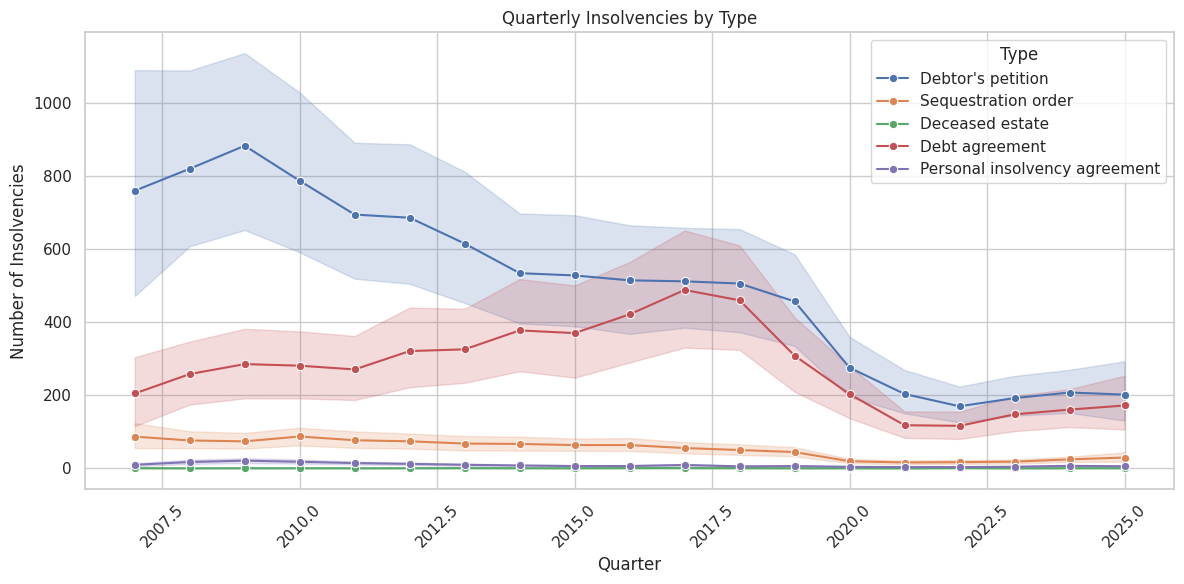

In [23]:
pinsolpd['Year'] = pinsolpd['Quarter'].dt.year
pinsolpd['Year'] = pinsolpd['Year'].astype(int)

exclude_types = ["Total bankruptcies", "Total personal insolvencies"]

#filtering
pinsolpd_ex = pinsolpd[~pinsolpd['Type of personal insolvency administration'].isin(exclude_types)].copy()

pinsolpd_ex['Type of personal insolvency administration'] = (
    pinsolpd_ex['Type of personal insolvency administration'].astype(str)
)


plt.figure()
sns.lineplot(
    data=pinsolpd_ex,
    x='Year',
    y='Number of people entering a new personal insolvency',
    hue='Type of personal insolvency administration',
    marker='o'
)
plt.title("Quarterly Insolvencies by Type")
plt.ylabel("Number of Insolvencies")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
#plt.savefig('figures/insolvencies_by_type.png', dpi=300)
plt.show()

/tmp/ipython-input-4143768090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rinsolpd['Year'] = rinsolpd['Quarter'].dt.year


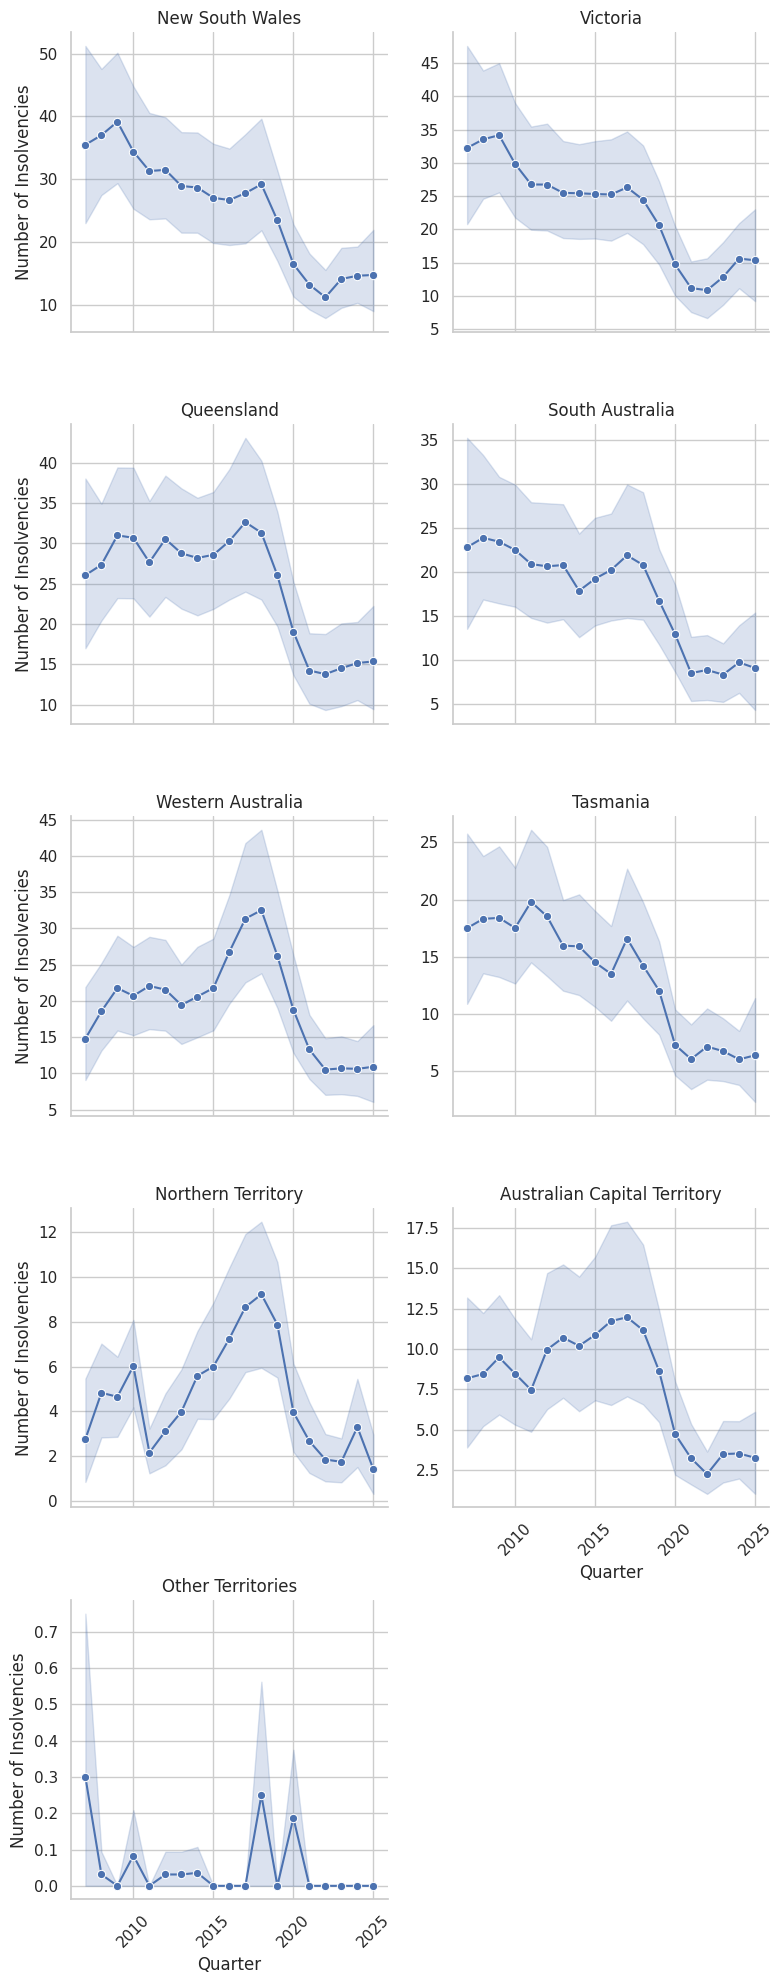

In [24]:
rinsolpd['Year'] = rinsolpd['Quarter'].dt.year


g = sns.FacetGrid(rinsolpd, col="State", col_wrap=2, height=4, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x='Year',
    y='Number of people entering a new personal insolvency',
    marker='o'
)
g.set_axis_labels("Quarter", "Number of Insolvencies")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
#g.savefig('figures/insolvencies_by_state.png', dpi=300)
plt.show()

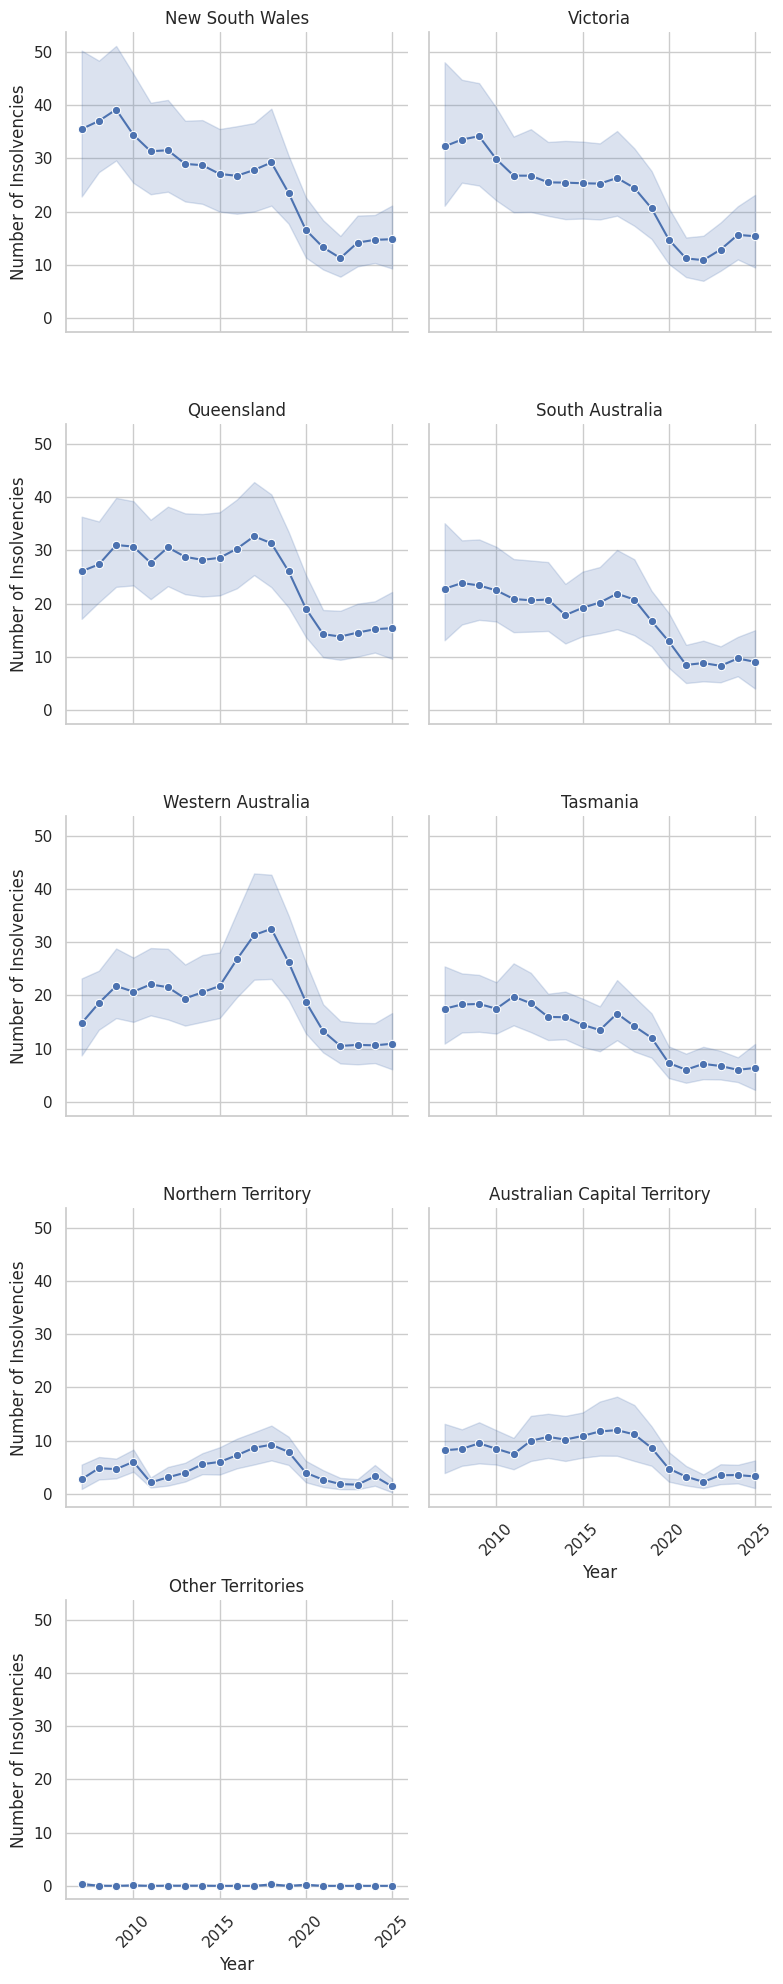

In [25]:
g = sns.FacetGrid(rinsolpd, col="State", col_wrap=2, height=4, sharey=True)
g.map_dataframe(
    sns.lineplot,
    x='Year',
    y='Number of people entering a new personal insolvency',
    marker='o'
)
g.set_axis_labels("Year", "Number of Insolvencies")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
# g.savefig('figures/insolvencies_by_state.png', dpi=300)
plt.show()


/tmp/ipython-input-3775311759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rinsolpd['Year'] = rinsolpd['Year'].astype(int)


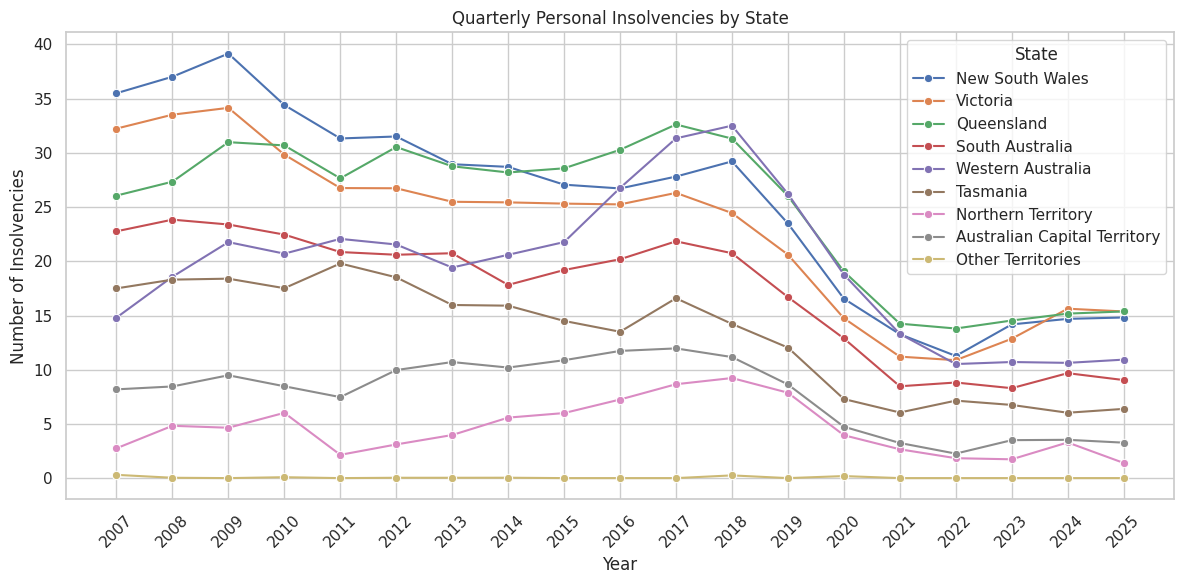

In [26]:
rinsolpd['Year'] = rinsolpd['Year'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=rinsolpd,
    x='Year',
    y='Number of people entering a new personal insolvency',
    hue='State',
    marker='o',
    errorbar=None
)

years = sorted(rinsolpd['Year'].unique())
plt.xticks(years, rotation=45)

plt.xlabel("Year")
plt.ylabel("Number of Insolvencies")
plt.title("Quarterly Personal Insolvencies by State")
plt.legend(title="State")
plt.tight_layout()
plt.show()

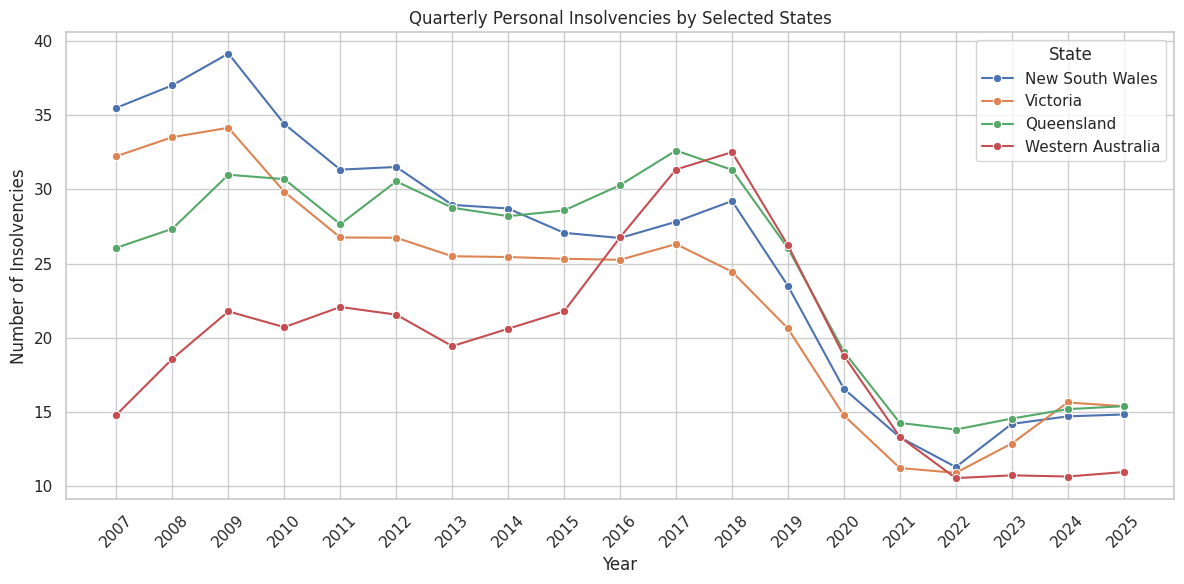

In [27]:
selected_states = ["New South Wales", "Queensland", "Victoria", "Western Australia"]
rinsolpd_subset = rinsolpd[rinsolpd['State'].isin(selected_states)].copy()

if rinsolpd_subset['State'].dtype.name == 'category':
    rinsolpd_subset['State'] = rinsolpd_subset['State'].cat.remove_unused_categories()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=rinsolpd_subset,
    x='Year',
    y='Number of people entering a new personal insolvency',
    hue='State',
    marker='o',
    errorbar=None
)

years = sorted(rinsolpd_subset['Year'].unique())
plt.xticks(years, rotation=45)

plt.xlabel("Year")
plt.ylabel("Number of Insolvencies")
plt.title("Quarterly Personal Insolvencies by Selected States")
plt.legend(title="State")
plt.tight_layout()
plt.show()


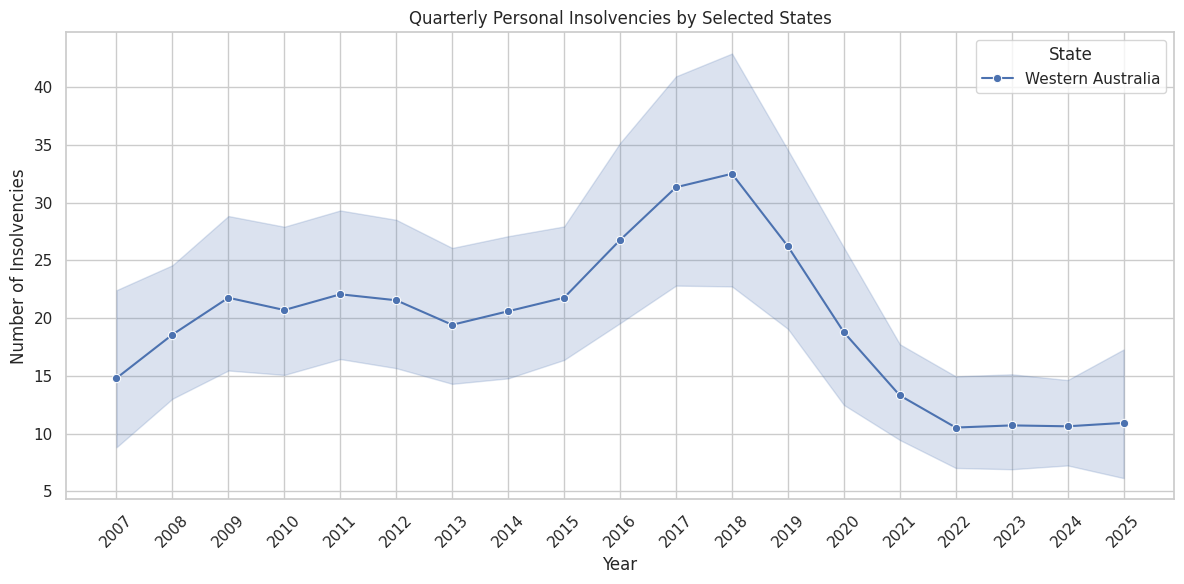

In [28]:
selected_states = ["Western Australia"]
rinsolpd_subset = rinsolpd[rinsolpd['State'].isin(selected_states)].copy()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=rinsolpd_subset,
    x='Year',
    y='Number of people entering a new personal insolvency',
    hue='State',
    marker='o'
)

years = sorted(rinsolpd_subset['Year'].unique())
plt.xticks(years, rotation=45)

plt.xlabel("Year")
plt.ylabel("Number of Insolvencies")
plt.title("Quarterly Personal Insolvencies by Selected States")
plt.legend(title="State")
plt.tight_layout()
plt.show()


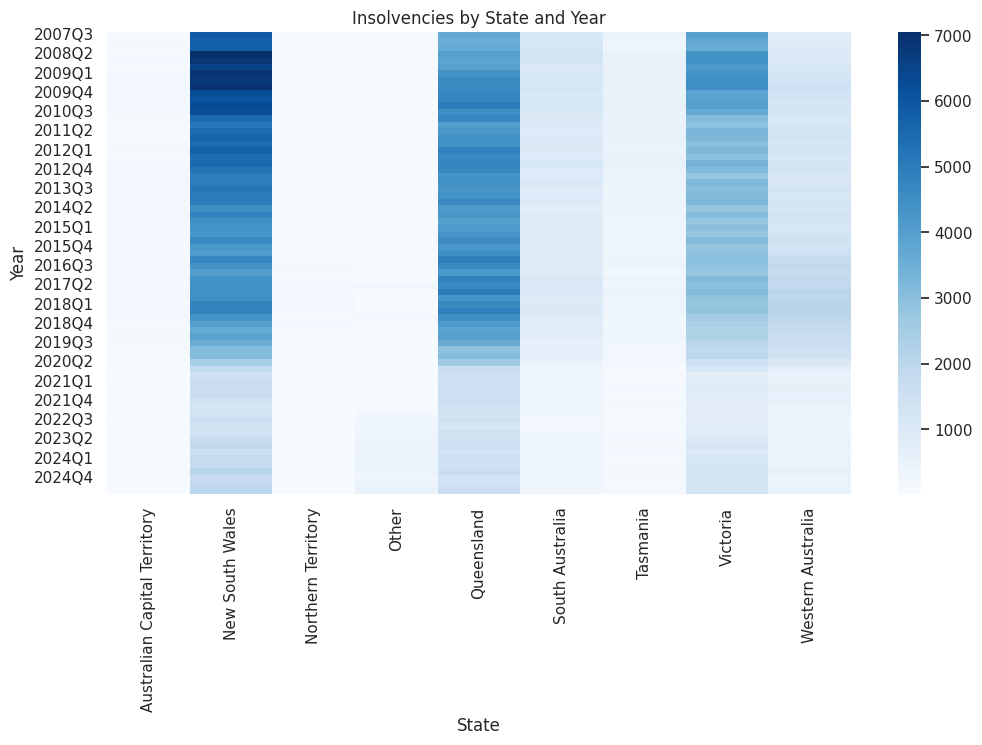

In [29]:
state_year_pivot = (
    total_pinsol.groupby(['Quarter', 'State'])
    ['Number of people entering a new personal insolvency']
    .sum()
    .unstack()
)

plt.figure(figsize=(12,6))
sns.heatmap(state_year_pivot, annot=False, cmap="Blues")
plt.title("Insolvencies by State and Year")
plt.ylabel("Year")
plt.xlabel("State")
plt.show()


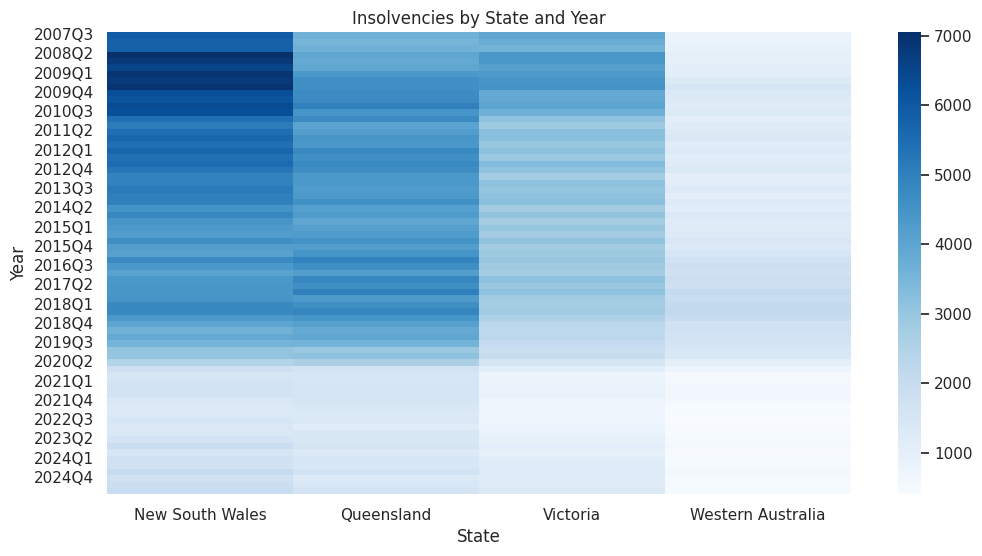

In [30]:
selected_states = ["New South Wales", "Queensland", "Victoria", "Western Australia"]

pinsolpd_subset = total_pinsol[total_pinsol['State'].isin(selected_states)].copy()

state_year_pivot = (
    pinsolpd_subset.groupby(['Quarter', 'State'])
    ['Number of people entering a new personal insolvency']
    .sum()
    .unstack()
)

plt.figure(figsize=(12,6))
sns.heatmap(state_year_pivot, annot=False, cmap="Blues")
plt.title("Insolvencies by State and Year")
plt.ylabel("Year")
plt.xlabel("State")
plt.show()


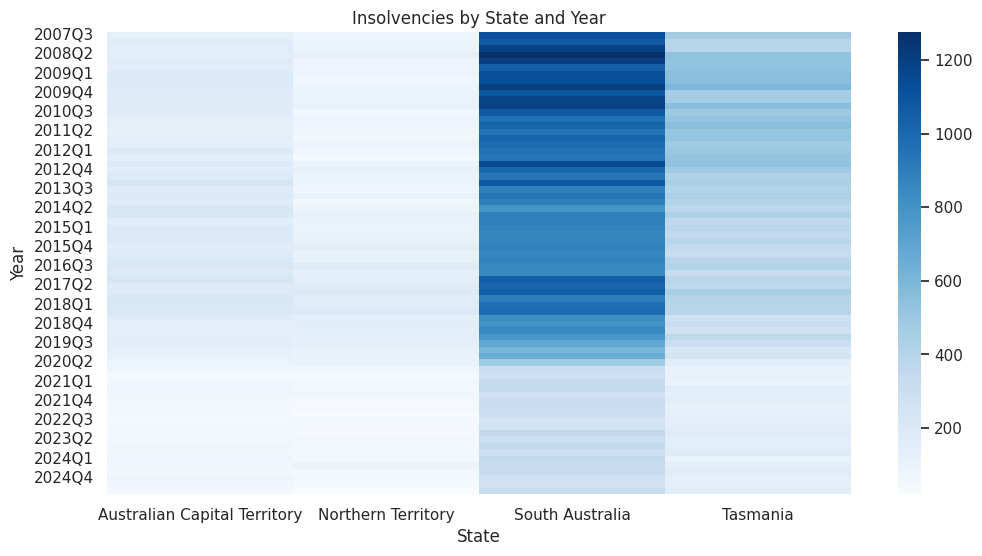

In [31]:
selected_states = ["Tasmania", "South Australia", "Australian Capital Territory", "Northern Territory"]

pinsolpd_subset = total_pinsol[total_pinsol['State'].isin(selected_states)].copy()

state_year_pivot = (
    pinsolpd_subset.groupby(['Quarter', 'State'])
    ['Number of people entering a new personal insolvency']
    .sum()
    .unstack()
)

plt.figure(figsize=(12,6))
sns.heatmap(state_year_pivot, annot=False, cmap="Blues")
plt.title("Insolvencies by State and Year")
plt.ylabel("Year")
plt.xlabel("State")
plt.show()


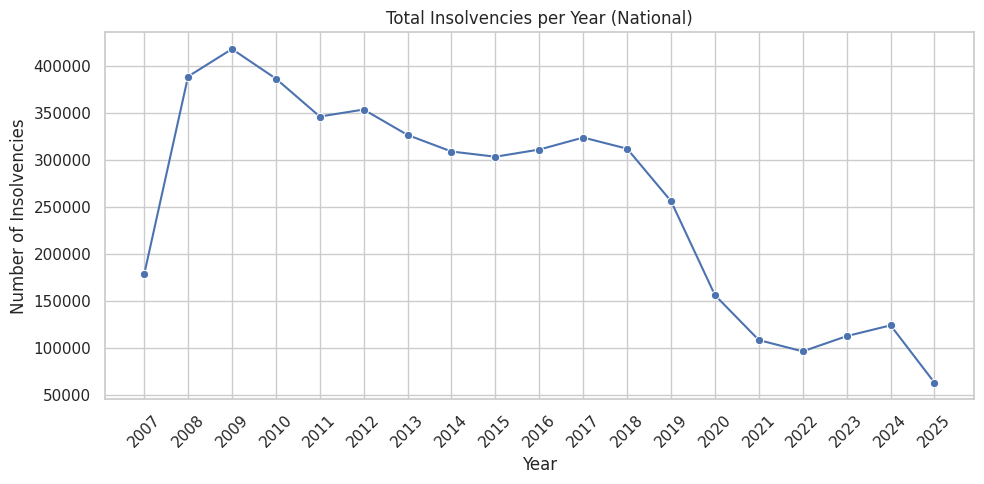

In [32]:
yearly_totals = (
    pinsolpd.groupby('Year')
    ['Number of people entering a new personal insolvency']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=yearly_totals,
    x='Year',
    y='Number of people entering a new personal insolvency',
    marker='o'
)

years = sorted(yearly_totals['Year'].unique())
plt.xticks(years, rotation=45)

plt.title("Total Insolvencies per Year (National)")
plt.xlabel("Year")
plt.ylabel("Number of Insolvencies")
plt.tight_layout()
plt.show()



Wealth data

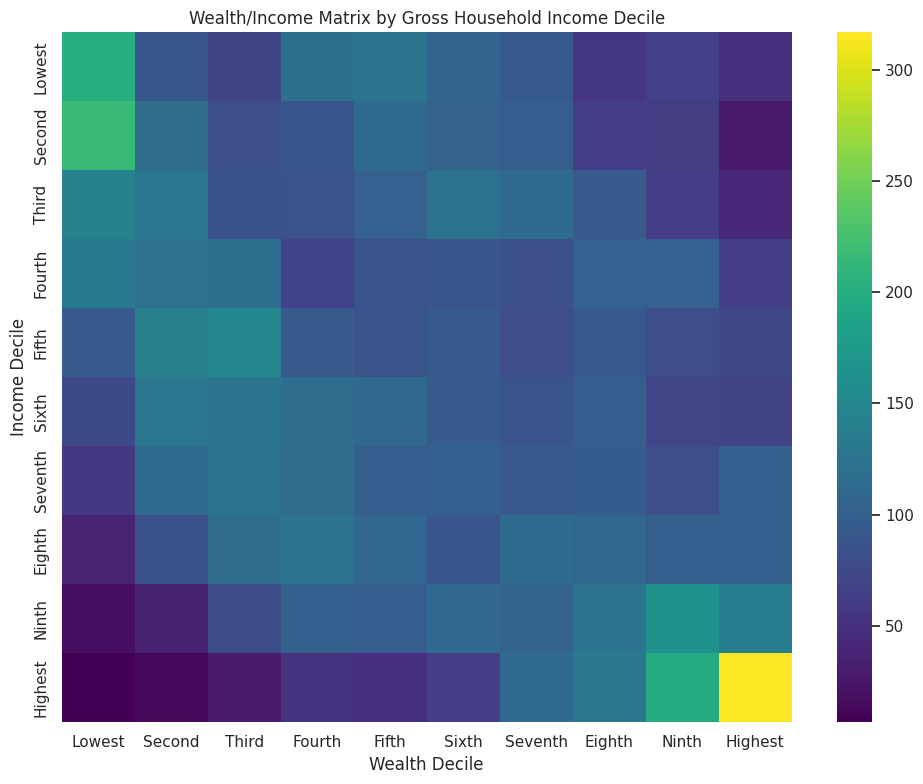

In [33]:
w1dfs = w1df.set_index('Gross household income decile').drop(columns=['All households'])
w1dfs = w1dfs.drop(index='All households')

plt.figure(figsize=(10, 8))
sns.heatmap(w1dfs, annot=False, cmap='viridis')
plt.title('Wealth/Income Matrix by Gross Household Income Decile')
plt.xlabel('Wealth Decile')
plt.ylabel('Income Decile')
plt.tight_layout()
plt.show()

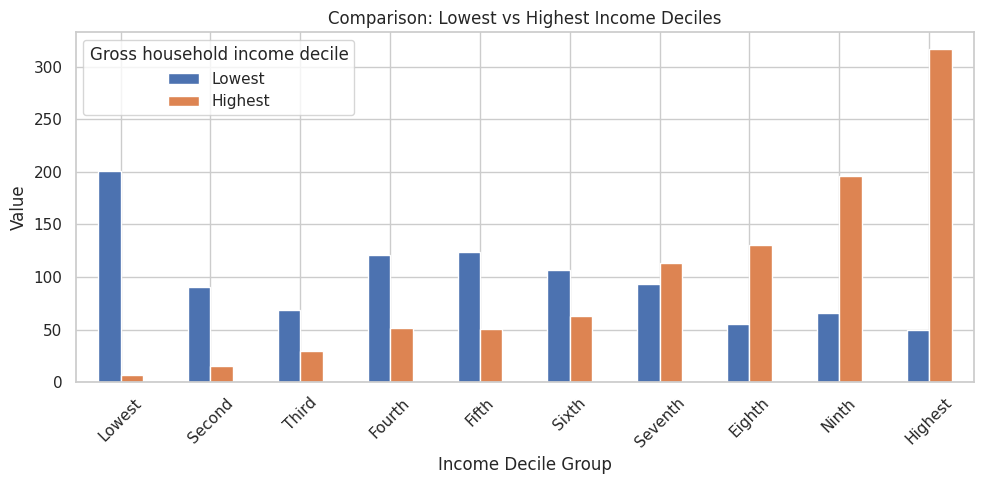

In [34]:
comparison = w1df.set_index('Gross household income decile').loc[['Lowest','Highest']].drop(columns=['All households'])

comparison.T.plot(kind='bar', figsize=(10,5))
plt.title('Comparison: Lowest vs Highest Income Deciles')
plt.ylabel('Value')
plt.xlabel('Income Decile Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

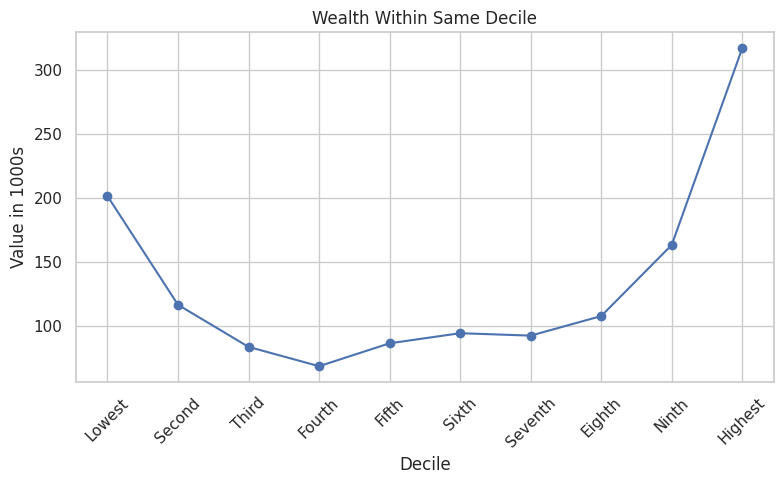

In [35]:
diagonal_values = w1dfs.stack().reset_index()
diagonal_values = diagonal_values[diagonal_values['Gross household income decile'] == diagonal_values['level_1']]

plt.figure(figsize=(8,5))
plt.plot(diagonal_values['Gross household income decile'], diagonal_values[0], marker='o')
plt.title('Wealth Within Same Decile')
plt.ylabel('Value in 1000s')
plt.xlabel('Decile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
w2df_matrix = w2df.set_index('Gross household income decile').drop(columns=['All households'])
w2df_matrix = w2df_matrix.drop(index='All households')

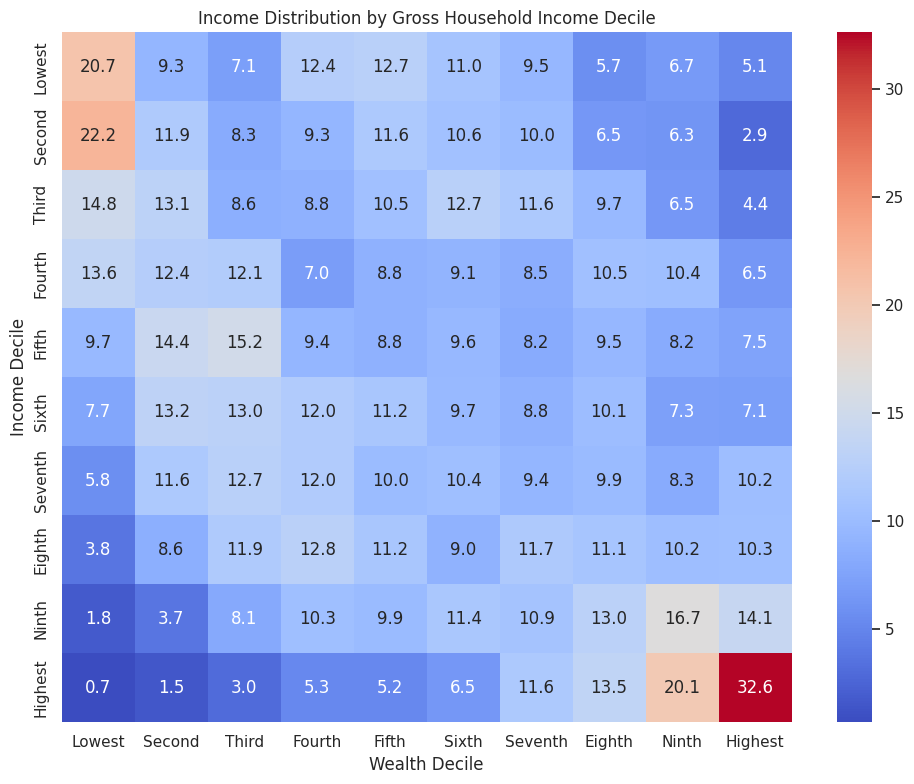

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(w2df_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Income Distribution by Gross Household Income Decile')
plt.xlabel('Wealth Decile')
plt.ylabel('Income Decile')
plt.tight_layout()
plt.show()


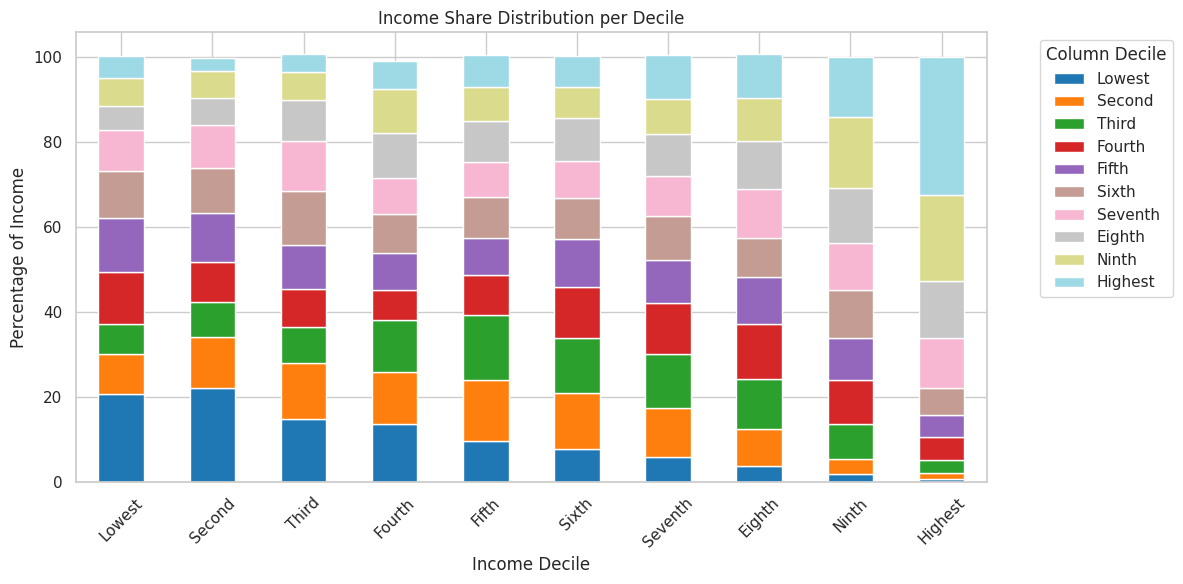

In [38]:
w2df_matrix.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Income Share Distribution per Decile')
plt.ylabel('Percentage of Income')
plt.xlabel('Income Decile')
plt.legend(title='Column Decile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


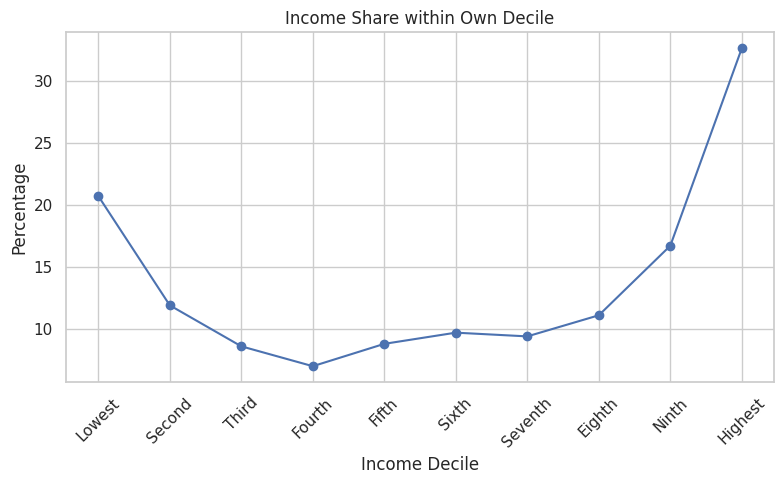

In [39]:
diagonal_values = w2df_matrix.values.diagonal()

plt.figure(figsize=(8,5))
plt.plot(w2df_matrix.index, diagonal_values, marker='o')
plt.title('Income Share within Own Decile')
plt.ylabel('Percentage')
plt.xlabel('Income Decile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


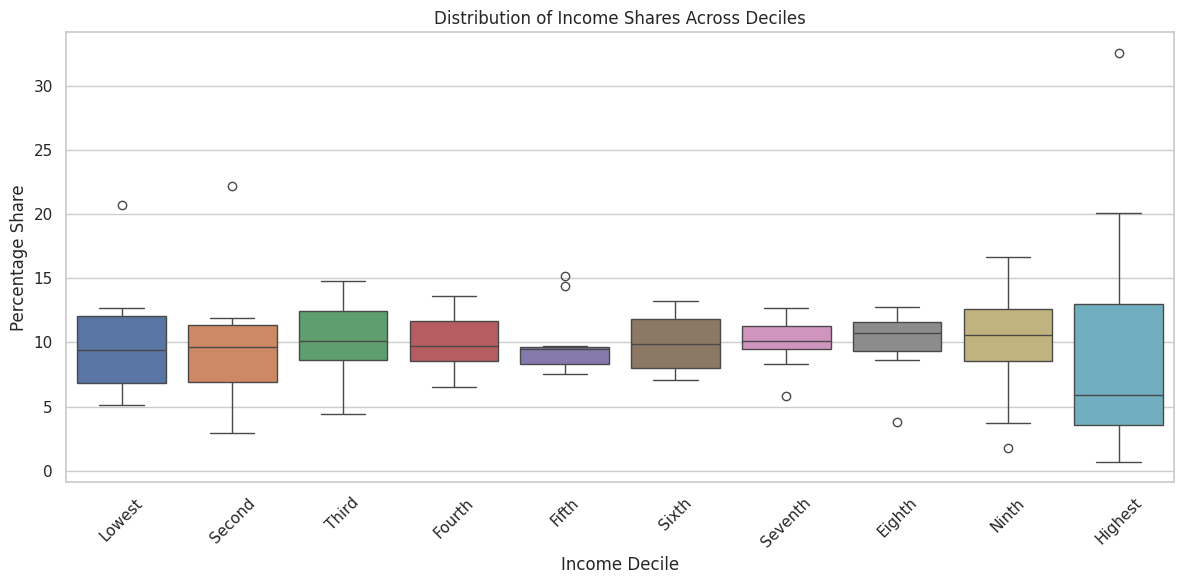

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data=w2df_matrix.T)
plt.title('Distribution of Income Shares Across Deciles')
plt.ylabel('Percentage Share')
plt.xlabel('Income Decile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Observations and Summary

### Personal Insolvency

National insolvency levels show a clear peak around 2009–2010, likely reflecting the effects of the Global Financial Crisis, followed by a steady decline in subsequent years. At the state level, insolvency burdens are unevenly distributed, with some jurisdictions consistently reporting higher rates. Heatmap patterns indicate both temporal fluctuations and spatial clustering in financial stress.

### Wealth and Income

Wealth is strongly stratified by income, with most households holding assets within their own income decile. However, cross-decile variation shows that some households either accumulate more wealth than their income suggests or fall below expected asset levels.

Income distribution similarly reflects this stratification: higher-income households command a disproportionate share of total wealth and income, while lower deciles contribute minimally. Within each decile, there is notable heterogeneity in both wealth retention and income share, indicating unequal resilience even among households with similar income levels.